This file is meant mostly for preliminary testing and visualization. Code from here is adapted and placed into `serial_comms.py` which is what's actually run by the Pi

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# all dims taken from https://api.vex.com/vr/home/playgrounds/v5rc_high_stakes/field_details.html
field_size = 144  # vex field is 144" square
resolution = 1    # scale down to 72 x 72 grid, so each cell is 50mm x 50mm. 144x144 matrix is manageable.
grid_size = field_size // resolution  # num cells per side

occupancy_grid = np.zeros((grid_size, grid_size), dtype=int) # occ grid starts empty

In [3]:
# climb ladder leg positions
leg_positions = [
    (72, 48),
    (48, 72),
    (72, 96),
    (96, 72)
]

# Define the radius of the leg in grid cells
leg_radius = 5

# Mark the area taken up by each leg in the occupancy grid
for leg_position in leg_positions:
    x, y = leg_position
    x_cell = x // resolution
    y_cell = y // resolution
    for i in range(-leg_radius, leg_radius + 1):
        for j in range(-leg_radius, leg_radius + 1):
            if 0 <= x_cell + i < grid_size and 0 <= y_cell + j < grid_size:
                occupancy_grid[y_cell + j, x_cell + i] = 1

In [4]:
for leg_position in leg_positions:
    x, y = leg_position
    x_cell = x // resolution
    y_cell = y // resolution
    occupancy_grid[y_cell, x_cell] = 1

In [5]:
from skimage.graph import route_through_array

# cost map for grid
input_cost_grid = np.ones((grid_size, grid_size), dtype=float)
input_cost_grid[occupancy_grid == 1] = np.inf

path = route_through_array(input_cost_grid, (0, 0), (71, 36))

In [6]:
path = path[0] # path[1] is just the cost, but we don't really care about that. 

In [7]:
path_real_world = [(x * resolution, y * resolution) for x, y in path] # For each cell in the path, we can just multiply by the resolution?

In [8]:
path_real_world

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 0),
 (26, 0),
 (27, 0),
 (28, 0),
 (29, 0),
 (30, 0),
 (31, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 1),
 (37, 2),
 (38, 3),
 (39, 4),
 (40, 5),
 (41, 6),
 (42, 7),
 (43, 8),
 (44, 9),
 (45, 10),
 (46, 11),
 (47, 12),
 (48, 13),
 (49, 14),
 (50, 15),
 (51, 16),
 (52, 17),
 (53, 18),
 (54, 19),
 (55, 20),
 (56, 21),
 (57, 22),
 (58, 23),
 (59, 24),
 (60, 25),
 (61, 26),
 (62, 27),
 (63, 28),
 (64, 29),
 (65, 30),
 (66, 31),
 (67, 32),
 (68, 33),
 (69, 34),
 (70, 35),
 (71, 36)]

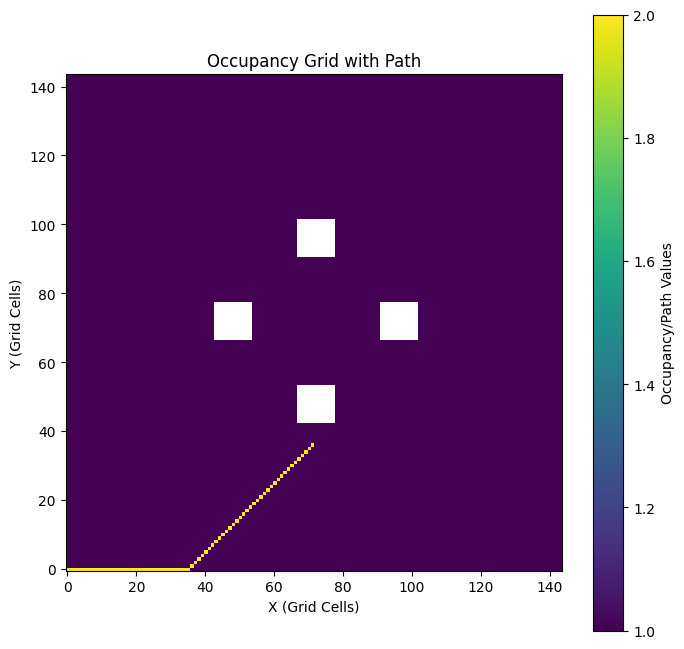

In [9]:
grid_with_path = input_cost_grid.copy()

# Mark the path cells in the grid
# chatgpt generated
for y, x in path:  # skimage returns (row, col) = (y, x)
    grid_with_path[x, y] = 2  # Use a distinct value for the path

# Plot the grid with the path
plt.figure(figsize=(8, 8))
plt.imshow(grid_with_path, cmap='viridis', origin='lower')
plt.colorbar(label='Occupancy/Path Values')
plt.title("Occupancy Grid with Path")
plt.xlabel("X (Grid Cells)")
plt.ylabel("Y (Grid Cells)")
plt.show()